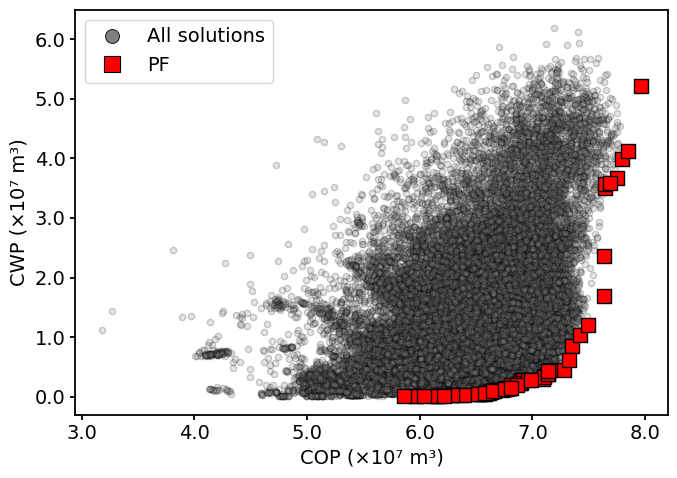

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D

# ---------------------------------------------------
# Style FIRST (this resets rcParams)
# ---------------------------------------------------
plt.style.use("default")

# ---------------------------------------------------
# Global font and style configuration (AFTER style)
# ---------------------------------------------------
font_size = 14
mpl.rcParams.update({
    "font.size": font_size,
    "axes.labelsize": font_size,
    "axes.titlesize": font_size,
    "xtick.labelsize": font_size,
    "ytick.labelsize": font_size,
    "legend.fontsize": font_size,
    "axes.linewidth": 1.3,
})

# ---------------------------------------------------
# Load dataset
# ---------------------------------------------------
df = pd.read_csv("datasets/MOU1D.csv", delimiter=";", engine="python")
objs = df.values[:, -2:]

# ---------------------------------------------------
# Objective directions
# True  -> minimize
# False -> maximize
# ---------------------------------------------------
minimize = np.array([False, True])

# ---------------------------------------------------
# Dominance check
# ---------------------------------------------------
def dominates(q, p, minimize):
    better_or_equal = True
    strictly_better = False

    for k in range(len(p)):
        if minimize[k]:
            if q[k] > p[k]:
                return False
            if q[k] < p[k]:
                strictly_better = True
        else:
            if q[k] < p[k]:
                return False
            if q[k] > p[k]:
                strictly_better = True

    return strictly_better

# ---------------------------------------------------
# Update Pareto front
# ---------------------------------------------------
def update_pareto_front(current_pf, batch, minimize):
    for b in batch:
        dominated = False
        to_remove = []

        for i, p in enumerate(current_pf):
            if dominates(p, b, minimize):
                dominated = True
                break
            if dominates(b, p, minimize):
                to_remove.append(i)

        if not dominated:
            for idx in reversed(to_remove):
                current_pf.pop(idx)
            current_pf.append(b)

    return current_pf

# ---------------------------------------------------
# Compute Pareto front
# ---------------------------------------------------
batch_size = 2000
pareto_frontier = []

for start in range(0, len(objs), batch_size):
    batch = objs[start:start + batch_size]
    pareto_frontier = update_pareto_front(pareto_frontier, batch, minimize)

pf = np.array(pareto_frontier)

# ---------------------------------------------------
# Plot
# ---------------------------------------------------
plt.figure(figsize=(7, 5))

plt.scatter(
    objs[:, 0], objs[:, 1],
    color="grey",
    alpha=0.2,
    s=20,
    rasterized=True,
    edgecolors="black"
)

plt.scatter(
    pf[:, 0], pf[:, 1],
    color="red",
    s=100,
    marker="s",
    edgecolors="black"
)

plt.xlabel("COP (×10⁷ m³)")
plt.ylabel("CWP (×10⁷ m³)")

ax = plt.gca()

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x/1e7:.1f}"))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y/1e7:.1f}"))

ax.tick_params(colors="black", width=1.3)

legend_elements = [
    Line2D(
        [0], [0],
        marker="o",
        linestyle="",
        markerfacecolor="grey",
        markeredgecolor="black",
        markeredgewidth=0.6,
        markersize=10,
        label="All solutions"
    ),
    Line2D(
        [0], [0],
        marker="s",
        linestyle="",
        markerfacecolor="red",
        markeredgecolor="black",
        markeredgewidth=0.8,
        markersize=11,
        label="PF"
    )
]

ax.legend(handles=legend_elements, loc="upper left", frameon=True)

plt.tight_layout()
plt.savefig("figures/MOU1D.pdf")
# plt.show()


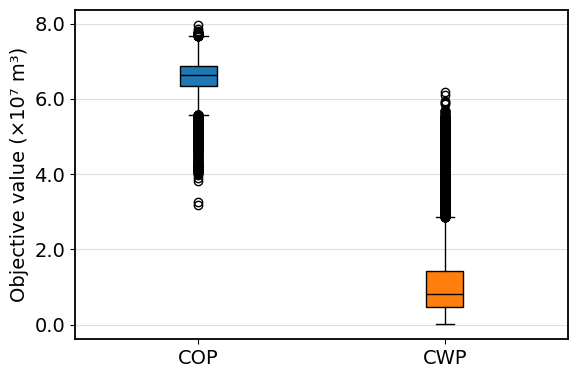

In [3]:
import matplotlib.pyplot as plt

obj_cols = ["COP", "CWP"]

plt.figure(figsize=(6, 4))
box = plt.boxplot(
    objs,
    tick_labels=obj_cols,
    showfliers=True,
    patch_artist=True
)

colors = ["tab:blue", "tab:orange"]

for element in ["boxes", "whiskers", "caps", "medians"]:
    plt.setp(box[element], color="black")

for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)

plt.ylabel("Objective value (×10⁷ m³)")
plt.grid(True, axis="y", alpha=0.4)
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y/1e7:.1f}"))
plt.tight_layout()
plt.savefig("figures/boxplot_MOU1D.pdf")
plt.show()

## Preprocessing

In [4]:
df1 = df.copy(deep=True)
df1.head(3)

,NA2_CONSIDER,NA3D_CONSIDER,NA1A_CONSIDER,PltPRDSTL_PltPRDSTO,PltPRDSTW,PltINJSTW,PROD005_DIRECTION,PROD005_I,PROD005_J,PROD005_K,...,INJ022_DIRECTION,INJ022_I,INJ022_J,INJ022_K,INJ023_DIRECTION,INJ023_I,INJ023_J,INJ023_K,COP,CWP
0,1,1,0,17825,9765.0,29955,I,27,20,1,...,J,71,24,15,I,39,15,15,72032300,25111700
1,0,1,1,20150,9765.0,32550,I,29,18,3,...,I,71,22,6,J,45,9,7,65086900,27430400
2,0,0,1,16275,9067.5,31465,I,27,20,1,...,J,69,22,8,I,39,13,15,68373700,40036600


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87022 entries, 0 to 87021
Data columns (total 78 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NA2_CONSIDER         87022 non-null  int64  
 1   NA3D_CONSIDER        87022 non-null  int64  
 2   NA1A_CONSIDER        87022 non-null  int64  
 3   PltPRDSTL_PltPRDSTO  87022 non-null  int64  
 4   PltPRDSTW            87022 non-null  float64
 5   PltINJSTW            87022 non-null  int64  
 6   PROD005_DIRECTION    87022 non-null  object 
 7   PROD005_I            87022 non-null  int64  
 8   PROD005_J            87022 non-null  int64  
 9   PROD005_K            87022 non-null  int64  
 10  PROD006_I            87022 non-null  int64  
 11  PROD006_J            87022 non-null  int64  
 12  PROD007_I            87022 non-null  int64  
 13  PROD007_J            87022 non-null  int64  
 14  PROD009_DIRECTION    87022 non-null  object 
 15  PROD009_I            87022 non-null 

In [6]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


class DirectionEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, suffix="_DIRECTION"):
        self.suffix = suffix

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        direction_cols = [col for col in X.columns if col.endswith(self.suffix)]
        for col in direction_cols:
            X[col] = X[col].map({'I': 0, 'J': 1})
        return X
    

preprocessor = Pipeline(steps=[
    ("direction_encoder", DirectionEncoder()),
    ("scaler", StandardScaler())
])

## Regression

In [7]:
##########################
# DATA
#########################

# dado
X = df1.drop(columns=["COP", "CWP"])
y = df1[["COP", "CWP"]]

In [8]:
#########################
# MODELS
#########################

from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import os


algorithms = {

    "RF": (
        RandomForestRegressor(random_state=0),
        {
            "model__n_estimators": [100, 200],
            "model__max_depth": [5, 10, None]
        }
    ),

    "GB": (
        MultiOutputRegressor(GradientBoostingRegressor(random_state=0)),
        {
            "model__estimator__n_estimators": [100, 200],
            "model__estimator__learning_rate": [0.05, 0.1]
        }
    ),

    "SVR": (
        MultiOutputRegressor(SVR()),
        {
            "model__estimator__C": [0.1, 1, 10, 50],
            "model__estimator__kernel": ["linear", "rbf"],
             "model__estimator__gamma": ["scale", "auto"]
        }
    ),

    "Ridge": (
        MultiOutputRegressor(Ridge()),
        {"model__estimator__alpha": [0.1, 1, 10]}
    ),

    "Lasso": (
        MultiOutputRegressor(Lasso(max_iter=5000)),
        {"model__estimator__alpha": [0.01, 0.1, 1]}
    ),

    "ElasticNet": (
        MultiOutputRegressor(ElasticNet(max_iter=5000)),
        {
            "model__estimator__alpha": [0.01, 0.1, 1],
            "model__estimator__l1_ratio": [0.1, 0.5, 0.9]
        }
    ),

    "KNN": (
        MultiOutputRegressor(KNeighborsRegressor()),
        {"model__estimator__n_neighbors": [3, 5, 7]}
    ),

    "CatBoost": (
    MultiOutputRegressor(
        CatBoostRegressor(
            loss_function="RMSE",
            random_seed=42,
            verbose=False,      # <-- SILENCIA LOGS
            thread_count=1      # <-- controle de paralelismo (fair comparison)
        )
    ),
    {
        "model__estimator__iterations": [300, 500],
        "model__estimator__learning_rate": [0.01, 0.05, 0.1],
        "model__estimator__depth": [6, 8, 10],
        "model__estimator__l2_leaf_reg": [1, 3, 5]
    }
),

    "XGBoost": (
    MultiOutputRegressor(
        XGBRegressor(
            objective="reg:squarederror",
            tree_method="hist",     
            device='cuda',       # força uso da GPU
            random_state=42,
            n_jobs=1
        )
    ),
    {
        "model__estimator__n_estimators": [200, 400],
        "model__estimator__max_depth": [3, 5, 7],
        "model__estimator__learning_rate": [0.01, 0.05, 0.1],
        "model__estimator__subsample": [0.8, 1.0],
        "model__estimator__colsample_bytree": [0.8, 1.0]
    }
    ),

    "LightGBM": (
        MultiOutputRegressor(
            LGBMRegressor(
                objective="regression",
                random_state=42,
                n_jobs=1,
                verbosity=-1, # silencia warnings
                device='gpu',       # força uso da GPU
                gpu_platform_id=0,  
                gpu_device_id=0     
            )
        ),
        {
            "model__estimator__n_estimators": [200, 400],
            "model__estimator__learning_rate": [0.01, 0.05, 0.1],
            "model__estimator__max_depth": [-1, 5, 10],
            "model__estimator__num_leaves": [31, 63, 127],
            "model__estimator__subsample": [0.8, 1.0],
            "model__estimator__colsample_bytree": [0.8, 1.0]
        }
    )
}


In [9]:
###########################
# PIPELINE
###########################

import time
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(
    "ignore",
    message=".*Falling back to prediction using DMatrix.*"
)

def run_multioutput_regression_cv(
    algorithms,
    X,
    y,
    preprocessor,
    n_splits=5
):
    scores = {}
    best_params = {}
    times = {}

    cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for name, (model, param_grid) in algorithms.items():

        print(f"Treinando {name}...")

        start_alg = time.time()

        fold_scores = []

        pipe = Pipeline(steps=[
            ("preprocess", preprocessor),
            ("model", model)
        ])

        grid = RandomizedSearchCV(
            estimator=pipe,
            param_distributions=param_grid,
            n_iter=10,
            scoring="neg_mean_squared_error",
            cv=cv,
            n_jobs=-1,
            verbose=2,
            random_state=42
        )

        start_search = time.time()
        grid.fit(X, y)
        end_search = time.time()
        search_time = end_search - start_search
        best_params[name] = grid.best_params_

        start_cv = time.time()
        # Avaliação por fold
        for train_idx, test_idx in cv.split(X):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            grid.best_estimator_.fit(X_train, y_train)
            y_pred = grid.best_estimator_.predict(X_test)

            fold_scores.append({
                "mse": mean_squared_error(y_test, y_pred, multioutput="uniform_average"),
                "mae": mean_absolute_error(y_test, y_pred, multioutput="uniform_average"),
                "r2": r2_score(y_test, y_pred, multioutput="uniform_average")
            })
        end_cv = time.time()
        cv_time = end_cv - start_cv

        scores[name] = fold_scores

        # ---- SALVA RESULTADOS PARCIAIS ----
        mean_results = pd.DataFrame({
            alg: [
                np.mean([s['mse'] for s in scores[alg]]),
                np.mean([s['mae'] for s in scores[alg]]),
                np.mean([s['r2'] for s in scores[alg]])
            ]
            for alg in scores
        }, index=['MSE', 'MAE', 'R²'])

        std_results = pd.DataFrame({
            alg: [
                np.std([s['mse'] for s in scores[alg]]),
                np.std([s['mae'] for s in scores[alg]]),
                np.std([s['r2'] for s in scores[alg]])
            ]
            for alg in scores
        }, index=['MSE', 'MAE', 'R²'])

        mean_results.to_csv("/home/flopes/artigo_matheus_jan26/2026_bracis_datasets/results/results_MOU1D/regression_results_mean.csv")
        std_results.to_csv("/home/flopes/artigo_matheus_jan26/2026_bracis_datasets/results/results_MOU1D/regression_results_std.csv")
        pd.DataFrame(best_params).T.to_csv("/home/flopes/artigo_matheus_jan26/2026_bracis_datasets/results/results_MOU1D/regression_best_params.csv")

        end_alg = time.time()
        total_time = end_alg - start_alg

        times[name] = {
            "search_time_min": search_time / 60,
            "cv_time_min": cv_time / 60,
            "total_time_min": total_time / 60
        }

    return scores, best_params, times

In [10]:
ini = time.time()
# Rodando a validação cross-validation
scores, best_params, times = run_multioutput_regression_cv(
    algorithms=algorithms,
    X=X,          
    y=y,         
    preprocessor=preprocessor,
    n_splits=5 
)

fim = time.time()
print('\nTempo TOTAL de execução:', round((fim - ini) / 60, 2), 'minutos')

times_df = pd.DataFrame(times).T.round(2)
times_df.to_csv("/home/flopes/artigo_matheus_jan26/2026_bracis_datasets/results/results_MOU1D/regression_times.csv")

print("\nTempo de execução por algoritmo (minutos)")
display(times_df)

mean_results = pd.DataFrame({
    alg: [
        np.mean([s['mse'] for s in scores[alg]]),
        np.mean([s['mae'] for s in scores[alg]]),
        np.mean([s['r2'] for s in scores[alg]])
    ]
    for alg in scores
}, index=['MSE', 'MAE', 'R²'])


std_results = pd.DataFrame({
    alg: [
        np.std([s['mse'] for s in scores[alg]]),
        np.std([s['mae'] for s in scores[alg]]),
        np.std([s['r2'] for s in scores[alg]])
    ]
    for alg in scores
}, index=['MSE', 'MAE', 'R²'])


mean_results.to_csv("/home/flopes/artigo_matheus_jan26/2026_bracis_datasets/results/results_MOU1D/regression_results_mean.csv")
std_results.to_csv("/home/flopes/artigo_matheus_jan26/2026_bracis_datasets/results/results_MOU1D/regression_results_std.csv")

pd.DataFrame(best_params).T.to_csv("/home/flopes/artigo_matheus_jan26/2026_bracis_datasets/results/results_MOU1D/regression_best_params.csv")

print("Média das métricas (↓ MSE/MAE melhor, ↑ R² melhor)")
display(mean_results.round(4))

print("Desvio padrão das métricas")
display(std_results.round(4))

Treinando RF...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ........model__max_depth=5, model__n_estimators=100; total time=  35.7s
[CV] END ........model__max_depth=5, model__n_estimators=100; total time=  35.9s
[CV] END ........model__max_depth=5, model__n_estimators=100; total time=  36.6s
[CV] END ........model__max_depth=5, model__n_estimators=100; total time=  36.8s
[CV] END ........model__max_depth=5, model__n_estimators=100; total time=  36.8s
[CV] END .......model__max_depth=10, model__n_estimators=100; total time=  57.8s
[CV] END .......model__max_depth=10, model__n_estimators=100; total time=  58.3s
[CV] END .......model__max_depth=10, model__n_estimators=100; total time=  58.5s
[CV] END .......model__max_depth=10, model__n_estimators=100; total time=  59.1s
[CV] END .......model__max_depth=10, model__n_estimators=100; total time=  59.7s
[CV] END ........model__max_depth=5, model__n_estimators=200; total time= 1.2min
[CV] END ........model__max_depth=5, model__n_estimators=200; total time= 1.2min
[CV] END ........model__max_

/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END model__estimator__learning_rate=0.1, model__estimator__n_estimators=100; total time=  56.9s
[CV] END model__estimator__learning_rate=0.05, model__estimator__n_estimators=100; total time=  58.4s
[CV] END model__estimator__learning_rate=0.1, model__estimator__n_estimators=100; total time=  57.5s
[CV] END model__estimator__learning_rate=0.05, model__estimator__n_estimators=100; total time=  58.7s
[CV] END model__estimator__learning_rate=0.1, model__estimator__n_estimators=100; total time=  57.8s
[CV] END model__estimator__learning_rate=0.05, model__estimator__n_estimators=100; total time=  58.6s
[CV] END model__estimator__learning_rate=0.05, model__estimator__n_estimators=100; total time=  59.1s
[CV] END model__estimator__learning_rate=0.1, model__estimator__n_estimators=100; total time=  58.3s
[CV] END model__estimator__learning_rate=0.1, model__estimator__n_estimators=100; total time=  58.3s
[CV] END model__estimator__learning_rate=0.05, model__estimator__n_estimators=100; tota

/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ........................model__estimator__alpha=0.1; total time=   0.4s
[CV] END ........................model__estimator__alpha=0.1; total time=   0.4s
[CV] END ........................model__estimator__alpha=0.1; total time=   0.4s
[CV] END ........................model__estimator__alpha=0.1; total time=   0.5s
[CV] END ........................model__estimator__alpha=0.1; total time=   0.4s
[CV] END ..........................model__estimator__alpha=1; total time=   0.4s
[CV] END ..........................model__estimator__alpha=1; total time=   0.5s
[CV] END ..........................model__estimator__alpha=1; total time=   0.5s
[CV] END ..........................model__estimator__alpha=1; total time=   0.4s
[CV] END .........................model__estimator__alpha=10; total time=   0.4s
[CV] END ..........................model__estimator__alpha=1; total time=   0.4s
[CV] END .........................model__estimator__alpha=10; total time=   0.4s
[CV] END ...................

/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ........................model__estimator__alpha=0.1; total time=   5.7s
[CV] END ........................model__estimator__alpha=0.1; total time=   5.7s
[CV] END ........................model__estimator__alpha=0.1; total time=   5.9s
[CV] END .......................model__estimator__alpha=0.01; total time=   6.6s
[CV] END .......................model__estimator__alpha=0.01; total time=   6.8s
[CV] END ..........................model__estimator__alpha=1; total time=   7.9s
[CV] END ..........................model__estimator__alpha=1; total time=   8.3s
[CV] END ..........................model__estimator__alpha=1; total time=   8.3s
[CV] END ........................model__estimator__alpha=0.1; total time=   8.8s
[CV] END ..........................model__estimator__alpha=1; total time=   8.8s
[CV] END ..........................model__estimator__alpha=1; total time=   9.0s
[CV] END ........................model__estimator__alpha=0.1; total time=   9.7s
[CV] END ...................

/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END model__estimator__alpha=0.1, model__estimator__l1_ratio=0.1; total time=  13.3s
[CV] END model__estimator__alpha=0.1, model__estimator__l1_ratio=0.1; total time=  13.2s
[CV] END model__estimator__alpha=0.1, model__estimator__l1_ratio=0.1; total time=  13.4s
[CV] END model__estimator__alpha=0.1, model__estimator__l1_ratio=0.1; total time=  13.3s
[CV] END model__estimator__alpha=0.1, model__estimator__l1_ratio=0.1; total time=  13.6s
[CV] END model__estimator__alpha=0.01, model__estimator__l1_ratio=0.5; total time=  16.8s
[CV] END model__estimator__alpha=0.01, model__estimator__l1_ratio=0.1; total time=  17.8s
[CV] END model__estimator__alpha=0.01, model__estimator__l1_ratio=0.5; total time=  17.5s
[CV] END model__estimator__alpha=0.01, model__estimator__l1_ratio=0.1; total time=  17.8s
[CV] END model__estimator__alpha=0.01, model__estimator__l1_ratio=0.5; total time=  17.6s
[CV] END model__estimator__alpha=0.01, model__estimator__l1_ratio=0.5; total time=  17.8s
[CV] END model_

/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ....................model__estimator__n_neighbors=3; total time=  12.6s
[CV] END ....................model__estimator__n_neighbors=3; total time=  12.7s
[CV] END ....................model__estimator__n_neighbors=5; total time=  12.7s
[CV] END ....................model__estimator__n_neighbors=5; total time=  12.7s
[CV] END ....................model__estimator__n_neighbors=7; total time=  12.8s
[CV] END ....................model__estimator__n_neighbors=3; total time=  17.8s
[CV] END ....................model__estimator__n_neighbors=3; total time=  18.0s
[CV] END ....................model__estimator__n_neighbors=5; total time=  17.9s
[CV] END ....................model__estimator__n_neighbors=5; total time=  18.0s
[CV] END ....................model__estimator__n_neighbors=3; total time=  18.0s
[CV] END ....................model__estimator__n_neighbors=5; total time=  17.8s
[CV] END ....................model__estimator__n_neighbors=7; total time=  17.8s
[CV] END ...................

/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END model__estimator__colsample_bytree=0.8, model__estimator__learning_rate=0.01, model__estimator__max_depth=3, model__estimator__n_estimators=200, model__estimator__subsample=0.8; total time=  21.2s
[CV] END model__estimator__colsample_bytree=0.8, model__estimator__learning_rate=0.01, model__estimator__max_depth=3, model__estimator__n_estimators=200, model__estimator__subsample=0.8; total time=  21.3s
[CV] END model__estimator__colsample_bytree=0.8, model__estimator__learning_rate=0.01, model__estimator__max_depth=3, model__estimator__n_estimators=200, model__estimator__subsample=0.8; total time=  21.2s
[CV] END model__estimator__colsample_bytree=0.8, model__estimator__learning_rate=0.01, model__estimator__max_depth=3, model__estimator__n_estimators=200, model__estimator__subsample=0.8; total time=  21.3s[CV] END model__estimator__colsample_bytree=0.8, model__estimator__learning_rate=0.01, model__estimator__max_depth=3, model__estimator__n_estimators=200, model__estimator__subsa

/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.1, model__estimator__max_depth=5, model__estimator__n_estimators=400, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time=  34.9s


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.1, model__estimator__max_depth=5, model__estimator__n_estimators=400, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time=  38.8s


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.1, model__estimator__max_depth=5, model__estimator__n_estimators=400, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time=  41.9s


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.1, model__estimator__max_depth=5, model__estimator__n_estimators=400, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time= 1.1min


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.1, model__estimator__max_depth=5, model__estimator__n_estimators=400, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time= 1.1min


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=0.8, model__estimator__learning_rate=0.01, model__estimator__max_depth=5, model__estimator__n_estimators=200, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time=  38.0s


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=0.8, model__estimator__learning_rate=0.01, model__estimator__max_depth=5, model__estimator__n_estimators=200, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time=  37.6s


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=0.8, model__estimator__learning_rate=0.01, model__estimator__max_depth=5, model__estimator__n_estimators=200, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time=  37.5s


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.01, model__estimator__max_depth=10, model__estimator__n_estimators=400, model__estimator__num_leaves=31, model__estimator__subsample=0.8; total time= 1.6min


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid featu

[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.01, model__estimator__max_depth=10, model__estimator__n_estimators=400, model__estimator__num_leaves=31, model__estimator__subsample=0.8; total time= 1.6min
[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.01, model__estimator__max_depth=10, model__estimator__n_estimators=400, model__estimator__num_leaves=31, model__estimator__subsample=0.8; total time= 1.6min


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.01, model__estimator__max_depth=10, model__estimator__n_estimators=400, model__estimator__num_leaves=31, model__estimator__subsample=0.8; total time= 1.6min
[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.01, model__estimator__max_depth=10, model__estimator__n_estimators=400, model__estimator__num_leaves=31, model__estimator__subsample=0.8; total time= 1.6min


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=0.8, model__estimator__learning_rate=0.01, model__estimator__max_depth=5, model__estimator__n_estimators=200, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time=  37.3s
[CV] END model__estimator__colsample_bytree=0.8, model__estimator__learning_rate=0.01, model__estimator__max_depth=5, model__estimator__n_estimators=200, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time=  37.0s


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid featu

[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.1, model__estimator__max_depth=10, model__estimator__n_estimators=400, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time= 2.7min
[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.1, model__estimator__max_depth=10, model__estimator__n_estimators=400, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time= 2.7min


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.1, model__estimator__max_depth=10, model__estimator__n_estimators=400, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time= 2.7min
[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.1, model__estimator__max_depth=10, model__estimator__n_estimators=400, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time= 2.7min


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.1, model__estimator__max_depth=10, model__estimator__n_estimators=400, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time= 2.7min


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.01, model__estimator__max_depth=-1, model__estimator__n_estimators=200, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time= 1.6min


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.05, model__estimator__max_depth=10, model__estimator__n_estimators=400, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time= 2.8min


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.01, model__estimator__max_depth=-1, model__estimator__n_estimators=200, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time= 1.5min


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.05, model__estimator__max_depth=10, model__estimator__n_estimators=400, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time= 2.8min


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid featu

[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.05, model__estimator__max_depth=10, model__estimator__n_estimators=400, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time= 2.8min
[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.05, model__estimator__max_depth=10, model__estimator__n_estimators=400, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time= 2.8min
[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.05, model__estimator__max_depth=10, model__estimator__n_estimators=400, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time= 2.8min


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.01, model__estimator__max_depth=-1, model__estimator__n_estimators=200, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time= 1.5min


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.1, model__estimator__max_depth=-1, model__estimator__n_estimators=200, model__estimator__num_leaves=63, model__estimator__subsample=0.8; total time= 1.5min


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.1, model__estimator__max_depth=-1, model__estimator__n_estimators=200, model__estimator__num_leaves=63, model__estimator__subsample=0.8; total time= 1.5min
[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.1, model__estimator__max_depth=-1, model__estimator__n_estimators=200, model__estimator__num_leaves=63, model__estimator__subsample=0.8; total time= 1.5min


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.1, model__estimator__max_depth=-1, model__estimator__n_estimators=200, model__estimator__num_leaves=63, model__estimator__subsample=0.8; total time= 1.5min


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.1, model__estimator__max_depth=-1, model__estimator__n_estimators=200, model__estimator__num_leaves=63, model__estimator__subsample=0.8; total time= 1.5min


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.01, model__estimator__max_depth=-1, model__estimator__n_estimators=200, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time= 1.6min


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.01, model__estimator__max_depth=-1, model__estimator__n_estimators=200, model__estimator__num_leaves=63, model__estimator__subsample=1.0; total time= 1.6min


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.1, model__estimator__max_depth=10, model__estimator__n_estimators=200, model__estimator__num_leaves=31, model__estimator__subsample=1.0; total time=  39.9s


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=0.8, model__estimator__learning_rate=0.1, model__estimator__max_depth=-1, model__estimator__n_estimators=200, model__estimator__num_leaves=31, model__estimator__subsample=1.0; total time=  46.8s
[CV] END model__estimator__colsample_bytree=0.8, model__estimator__learning_rate=0.1, model__estimator__max_depth=-1, model__estimator__n_estimators=200, model__estimator__num_leaves=31, model__estimator__subsample=1.0; total time=  46.6s


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.1, model__estimator__max_depth=10, model__estimator__n_estimators=200, model__estimator__num_leaves=31, model__estimator__subsample=1.0; total time=  41.2s
[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.1, model__estimator__max_depth=10, model__estimator__n_estimators=200, model__estimator__num_leaves=31, model__estimator__subsample=1.0; total time=  40.1s


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid featu

[CV] END model__estimator__colsample_bytree=0.8, model__estimator__learning_rate=0.1, model__estimator__max_depth=-1, model__estimator__n_estimators=200, model__estimator__num_leaves=31, model__estimator__subsample=1.0; total time=  47.0s
[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.1, model__estimator__max_depth=10, model__estimator__n_estimators=200, model__estimator__num_leaves=31, model__estimator__subsample=1.0; total time=  41.1s
[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.1, model__estimator__max_depth=10, model__estimator__n_estimators=200, model__estimator__num_leaves=31, model__estimator__subsample=1.0; total time=  39.4s
[CV] END model__estimator__colsample_bytree=0.8, model__estimator__learning_rate=0.1, model__estimator__max_depth=-1, model__estimator__n_estimators=200, model__estimator__num_leaves=31, model__estimator__subsample=1.0; total time=  46.8s


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=0.8, model__estimator__learning_rate=0.1, model__estimator__max_depth=-1, model__estimator__n_estimators=200, model__estimator__num_leaves=31, model__estimator__subsample=1.0; total time=  47.4s


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid featu

[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.01, model__estimator__max_depth=10, model__estimator__n_estimators=400, model__estimator__num_leaves=31, model__estimator__subsample=1.0; total time=  49.9s


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.01, model__estimator__max_depth=10, model__estimator__n_estimators=400, model__estimator__num_leaves=31, model__estimator__subsample=1.0; total time=  50.2s
[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.01, model__estimator__max_depth=10, model__estimator__n_estimators=400, model__estimator__num_leaves=31, model__estimator__subsample=1.0; total time=  49.7s


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.01, model__estimator__max_depth=10, model__estimator__n_estimators=400, model__estimator__num_leaves=31, model__estimator__subsample=1.0; total time=  34.4s
[CV] END model__estimator__colsample_bytree=1.0, model__estimator__learning_rate=0.01, model__estimator__max_depth=10, model__estimator__n_estimators=400, model__estimator__num_leaves=31, model__estimator__subsample=1.0; total time=  34.9s


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid featu


Tempo TOTAL de execução: 215.3 minutos

Tempo de execução por algoritmo (minutos)


,search_time_min,cv_time_min,total_time_min
RF,5.58,8.81,14.40
GB,2.63,4.30,6.93
SVR,119.59,60.80,180.39
Ridge,0.04,0.02,0.06
Lasso,0.21,0.07,0.28
ElasticNet,0.51,0.09,0.60
KNN,0.32,0.12,0.44
CatBoost,3.81,2.23,6.03
XGBoost,1.65,0.31,1.96
LightGBM,3.80,0.41,4.21


Média das métricas (↓ MSE/MAE melhor, ↑ R² melhor)


,RF,GB,SVR,Ridge,Lasso,ElasticNet,KNN,CatBoost,XGBoost,LightGBM
MSE,2.953474e+12,6.071143e+12,3.136690e+13,1.522300e+13,1.522303e+13,1.522294e+13,6.107276e+12,1.525577e+12,1.429165e+12,1.597394e+12
MAE,7.955962e+05,1.712898e+06,3.538028e+06,2.844340e+06,2.844374e+06,2.844140e+06,1.332499e+06,7.277444e+05,6.587284e+05,7.221837e+05
R²,9.300000e-01,8.389000e-01,2.984000e-01,6.041000e-01,6.041000e-01,6.041000e-01,8.477000e-01,9.636000e-01,9.671000e-01,9.629000e-01


Desvio padrão das métricas


,RF,GB,SVR,Ridge,Lasso,ElasticNet,KNN,CatBoost,XGBoost,LightGBM
MSE,1.500950e+11,1.124661e+11,3.717261e+11,2.121783e+11,2.121160e+11,2.125456e+11,1.890871e+11,4.123096e+10,7.337209e+10,5.135015e+10
MAE,1.340975e+04,1.617406e+04,2.380108e+04,1.922311e+04,1.921439e+04,1.927335e+04,1.802896e+04,5.280672e+03,7.667225e+03,7.745220e+03
R²,3.300000e-03,2.000000e-03,2.600000e-03,1.400000e-03,1.400000e-03,1.400000e-03,3.300000e-03,7.000000e-04,1.000000e-03,8.000000e-04


In [11]:
# # Subamostra X
# X_debug = X.sample(n=200, random_state=42)

# # Alinha y com os mesmos índices
# y_debug = y.loc[X_debug.index]

# ini = time.time()

# # Chamada correta da função
# scores, best_params = run_multioutput_regression_cv(
#     algorithms=algorithms,
#     X=X_debug,
#     y=y_debug,
#     preprocessor=preprocessor,
#     n_splits=2
# )

# fim = time.time()
# print('\nTempo de execução:', round((fim - ini)/60, 2), 'minutos')


# mean_results = pd.DataFrame({
#     alg: [
#         np.mean([s['mse'] for s in scores[alg]]),
#         np.mean([s['mae'] for s in scores[alg]]),
#         np.mean([s['r2'] for s in scores[alg]])
#     ]
#     for alg in scores
# }, index=['MSE','MAE','R²'])

# std_results = pd.DataFrame({
#     alg: [
#         np.std([s['mse'] for s in scores[alg]]),
#         np.std([s['mae'] for s in scores[alg]]),
#         np.std([s['r2'] for s in scores[alg]])
#     ]
#     for alg in scores
# }, index=['MSE','MAE','R²'])

# print("Média das métricas (↓ MSE/MAE melhor, ↑ R² melhor)")
# display(mean_results.round(4))

# print("Desvio padrão das métricas")
# display(std_results.round(4))


## MLP Regression (with Keras)

In [12]:
# import os
# import shutil
# from pathlib import Path

# def fix_cuda_paths():
#     # 1. Pega o caminho do ambiente Conda atual
#     conda_prefix = os.environ.get('CONDA_PREFIX')
#     if not conda_prefix:
#         print("Erro: Não foi possível detectar o ambiente Conda.")
#         return
    
#     base_lib = Path(conda_prefix) / "lib"
    
#     # 2. Procura onde o arquivo real está
#     libdevice_file = base_lib / "libdevice.10.bc"
    
#     if not libdevice_file.exists():
#         # Tenta achar em subpastas caso esteja escondido
#         found = list(base_lib.rglob("libdevice.10.bc"))
#         if found:
#             libdevice_file = found[0]
#         else:
#             print("Erro: Arquivo libdevice.10.bc não encontrado no ambiente.")
#             return

#     print(f"Arquivo original encontrado em: {libdevice_file}")

#     # 3. Cria a estrutura que o TensorFlow exige: nvvm/libdevice/
#     nvvm_dir = base_lib / "nvvm" / "libdevice"
#     nvvm_dir.mkdir(parents=True, exist_ok=True)
    
#     target_file = nvvm_dir / "libdevice.10.bc"

#     # 4. Cria um link simbólico (ou copia se falhar)
#     if not target_file.exists():
#         try:
#             # Tenta criar link simbólico (melhor opção)
#             os.symlink(libdevice_file, target_file)
#             print(f"Link simbólico criado com sucesso em: {target_file}")
#         except OSError:
#             # Se falhar (permissão ou sistema de arquivo), faz uma cópia física
#             shutil.copy(libdevice_file, target_file)
#             print(f"Arquivo copiado para: {target_file}")
#     else:
#         print("A estrutura de pastas correta já existe.")

#     # 5. Configura a variável de ambiente para o TensorFlow usar essa pasta
#     # Importante: Apontar para a pasta 'lib' base, o TF adiciona 'nvvm/libdevice' sozinho
#     os.environ['XLA_FLAGS'] = f"--xla_gpu_cuda_data_dir={base_lib}"
#     print("Variável XLA_FLAGS configurada.")

# # Executa a correção
# fix_cuda_paths()

In [13]:
import os

# Aponta para a pasta 'lib' do seu ambiente, onde criamos a pasta 'nvvm'
# O TensorFlow vai automaticamente procurar por 'nvvm/libdevice/libdevice.10.bc' dentro deste caminho
os.environ['XLA_FLAGS'] = "--xla_gpu_cuda_data_dir=/home/flopes/miniconda3/envs/gpu_env/lib"

# Opcional: Garante que as bibliotecas do CUDA (cudart, cublas) sejam achadas
os.environ['LD_LIBRARY_PATH'] = f"/home/flopes/miniconda3/envs/gpu_env/lib:{os.environ.get('LD_LIBRARY_PATH', '')}"

import tensorflow as tf

2026-01-20 12:17:22.894524: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-20 12:17:22.903071: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-20 12:17:22.913148: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-20 12:17:22.915984: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2026-01-20 12:17:22.922828: I tensorflow/core/platform/cpu_feature_guar

In [14]:
import time
import numpy as np
import tensorflow as tf
import keras_tuner as kt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2

import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [15]:
# # DEBUG - Subamostra X
# X = X.sample(n=100, random_state=42)

# # # Alinha y com os mesmos índices
# y = y.loc[X.index]

In [16]:
# def build_mlp(hp, n_features, n_outputs):

#     model = Sequential()

#     model.add(
#         Dense(
#             units=hp.Int("units_1", 64, 256, step=64),
#             activation="relu",
#             input_shape=(n_features,)
#         )
#     )

#     model.add(
#         Dense(
#             units=hp.Int("units_2", 32, 128, step=32),
#             activation="relu"
#         )
#     )

#     model.add(Dense(n_outputs))

#     model.compile(
#         optimizer=Adam(
#             learning_rate=hp.Choice("lr", [1e-3, 5e-4, 1e-4])
#         ),
#         loss="mse"
#     )

#     return model

def build_mlp(hp, n_features, n_outputs):
    model = Sequential()

    # Número de camadas ocultas
    n_layers = hp.Int("n_layers", min_value=1, max_value=3)

    for i in range(n_layers):
        # Número de unidades na camada
        units = hp.Int(f"units_{i}", min_value=64, max_value=512, step=64)

        # Função de ativação
        activation = hp.Choice(f"activation_{i}", ["relu", "tanh", "swish", "gelu"])

        # Camada densa com L2
        model.add(
            Dense(
                units,
                activation=activation,
                kernel_regularizer=l2(hp.Choice("l2", [0.0, 1e-4, 1e-3])),
                input_shape=(n_features,) if i == 0 else None
            )
        )

        # Batch Normalization opcional
        if hp.Boolean("batch_norm"):
            model.add(BatchNormalization())

        # Dropout
        model.add(Dropout(hp.Float("dropout", min_value=0.0, max_value=0.5, step=0.1)))

    # Camada de saída (regressão multi-output)
    model.add(Dense(n_outputs, activation="linear"))

    # Escolha do otimizador
    optimizer_name = hp.Choice("optimizer", ["adam", "rmsprop"])
    lr = hp.Choice("lr", [1e-2, 5e-3, 1e-3, 5e-4, 1e-4])

    optimizer = Adam(learning_rate=lr) if optimizer_name == "adam" else RMSprop(learning_rate=lr)

    model.compile(optimizer=optimizer, loss="mse")

    return model

In [17]:
def run_mlp_cv_keras_tuner(
    X,
    y,
    preprocessor,
    n_splits=5,
    max_trials=10,
    epochs=100,
    batch_size=32
):

    scores = []
    best_params = {}
    times = {}

    cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    start_total = time.time()
    search_time = 0
    cv_time = 0

    for fold, (train_idx, test_idx) in enumerate(cv.split(X), 1):

        print(f"\nMLP – Fold {fold}/{n_splits}")

        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # 🔹 Preprocessamento (fit apenas no treino)
        X_train_p = preprocessor.fit_transform(X_train)
        X_test_p  = preprocessor.transform(X_test)

        tuner = kt.RandomSearch(
            lambda hp: build_mlp(
                hp,
                n_features=X_train_p.shape[1],
                n_outputs=y.shape[1]
            ),
            objective="val_loss",
            max_trials=max_trials,
            directory="keras_tuner",
            project_name=f"mlp_fold_{fold}",
            overwrite=True
        )

        start_search = time.time()
        tuner.search(
            X_train_p,
            y_train,
            validation_split=0.2,
            epochs=epochs,
            batch_size=batch_size,
            verbose=0
        )
        search_time += time.time() - start_search

        best_model = tuner.get_best_models(1)[0]
        best_hp = tuner.get_best_hyperparameters(1)[0].values

        start_cv = time.time()
        y_pred = best_model.predict(X_test_p, verbose=0)
        cv_time += time.time() - start_cv

        scores.append({
            "mse": mean_squared_error(y_test, y_pred, multioutput="uniform_average"),
            "mae": mean_absolute_error(y_test, y_pred, multioutput="uniform_average"),
            "r2":  r2_score(y_test, y_pred, multioutput="uniform_average")
        })

        best_params[f"fold_{fold}"] = best_hp

        tf.keras.backend.clear_session()

    total_time = time.time() - start_total

    times = {
        "search_time_min": search_time / 60,
        "cv_time_min": cv_time / 60,
        "total_time_min": total_time / 60
    }

    return scores, best_params, times

In [18]:
scores_mlp, best_params_mlp, times_mlp = run_mlp_cv_keras_tuner(
    X=X,
    y=y,
    preprocessor=preprocessor,
    n_splits=5
)


MLP – Fold 1/5


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-20 12:17:24.935968: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10228 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:65:00.0, compute capability: 8.6
I0000 00:00:1768922246.761490 3802934 service.cc:146] XLA service 0x79628c003da0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1768922246.761550 3802934 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2026-01-20 12:17:26.805137: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268]


MLP – Fold 2/5


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
 


MLP – Fold 3/5


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
 


MLP – Fold 4/5


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
 


MLP – Fold 5/5


/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/flopes/miniconda3/envs/gpu_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
 

In [19]:
scores_2 = {}
best_params_2 = {}
times_2 = {}

In [20]:
display(scores_mlp)
display(times_mlp)
best_params_mlp

scores_2["MLP"] = scores_mlp
best_params_2["MLP"] = best_params_mlp
times_2["MLP"] = times_mlp

[{'mse': 14872387518464.0, 'mae': 2653349.25, 'r2': 0.7094020843505859},
 {'mse': 22405508497408.0, 'mae': 3201120.5, 'r2': 0.5767249464988708},
 {'mse': 26241149173760.0, 'mae': 3425395.5, 'r2': 0.4508879780769348},
 {'mse': 19939719118848.0, 'mae': 2807555.5, 'r2': 0.5610835552215576},
 {'mse': 21014509518848.0, 'mae': 3511778.0, 'r2': 0.4750226140022278}]

{'search_time_min': 192.86525499423345,
 'cv_time_min': 0.08648223479588826,
 'total_time_min': 193.066474767526}

In [21]:
times_df = pd.DataFrame(times_2).T.round(2)
times_df.to_csv("/home/flopes/artigo_matheus_jan26/2026_bracis_datasets/results/results_MOU1D/regression_times_MLP.csv")

print("\nTempo de execução por algoritmo (minutos)")
display(times_df)

mean_results_2 = pd.DataFrame({
    alg: [
        np.mean([s['mse'] for s in scores_2[alg]]),
        np.mean([s['mae'] for s in scores_2[alg]]),
        np.mean([s['r2'] for s in scores_2[alg]])
    ]
    for alg in scores_2
}, index=['MSE', 'MAE', 'R²'])

std_results_2 = pd.DataFrame({
    alg: [
        np.std([s['mse'] for s in scores_2[alg]]),
        np.std([s['mae'] for s in scores_2[alg]]),
        np.std([s['r2'] for s in scores_2[alg]])
    ]
    for alg in scores_2
}, index=['MSE', 'MAE', 'R²'])

mean_results_2.to_csv("/home/flopes/artigo_matheus_jan26/2026_bracis_datasets/results/results_MOU1D/regression_results_mean_MLP.csv")
std_results_2.to_csv("/home/flopes/artigo_matheus_jan26/2026_bracis_datasets/results/results_MOU1D/regression_results_std_MLP.csv")
pd.DataFrame(best_params_2).T.to_csv("/home/flopes/artigo_matheus_jan26/2026_bracis_datasets/results/results_MOU1D/regression_best_params_MLP.csv")
pd.DataFrame(best_params_2["MLP"]).T.to_csv("/home/flopes/artigo_matheus_jan26/2026_bracis_datasets/results/results_MOU1D/mlp_best_params_per_fold.csv")

print("Média das métricas (↓ MSE/MAE melhor, ↑ R² melhor)")
display(mean_results_2.round(4))

print("Desvio padrão das métricas")
display(std_results_2.round(4))


Tempo de execução por algoritmo (minutos)


,search_time_min,cv_time_min,total_time_min
MLP,192.87,0.09,193.07


Média das métricas (↓ MSE/MAE melhor, ↑ R² melhor)


,MLP
MSE,2.089465e+13
MAE,3.119840e+06
R²,5.546000e-01


Desvio padrão das métricas


,MLP
MSE,3.689489e+12
MAE,3.372599e+05
R²,9.120000e-02
